In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import glob
import re
import datetime
import seaborn as sns

In [2]:
# path = '/home/ksb/Bureau/ML_Fitec/kc_house_data.csv'
path='chemin du fichier'
data = pd.read_csv(path, delimiter=',', header=0, index_col=None)
data["date"] = pd.to_datetime(data["date"],format='%Y-%m-%d') #Transformation de la colonne "date"

# Analyse exploratoire

In [3]:
# Afficher les 5 premières lignes des données
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Afficher le nombre de lignes et de colonnes
data.shape

(21613, 21)

In [5]:
# Afficher les noms des colonnes
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Dictionnaire des variables

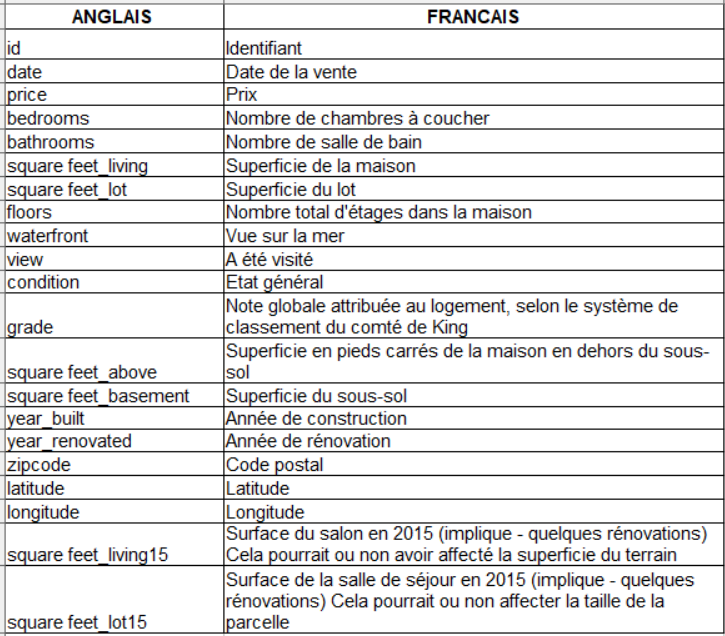

In [6]:
# On affaiche
from IPython.display import Image
Image (filename = "C:/Users/KS/Desktop/ML Fitec/Dictionnaire.png", width=500, height=500)

<Figure size 432x288 with 0 Axes>

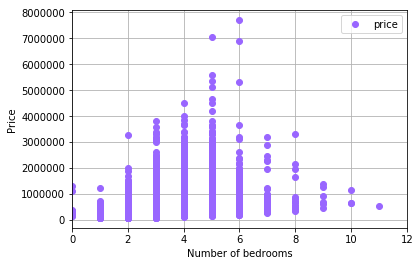

In [7]:
#1. Prix en fonction du nombre de chambres
plt.figure()
data.plot(x='bedrooms', y='price', c = '#9966ff', marker = 'o', linewidth = 0)
plt.xlim([0, 12])
plt.grid()
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.show()

#### On remarque que plus le nombre de chambres à coucher est important, plus le prix est élevé.

<Figure size 432x288 with 0 Axes>

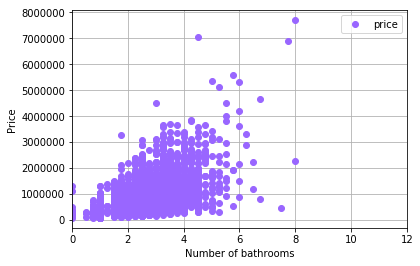

In [8]:
# Prix en foction du nombre de salles de bain
plt.figure()
data.plot(x='bathrooms', y='price', c = '#9966ff', marker = 'o', linewidth = 0)
plt.xlim([0, 12])
plt.grid()
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')
plt.show()

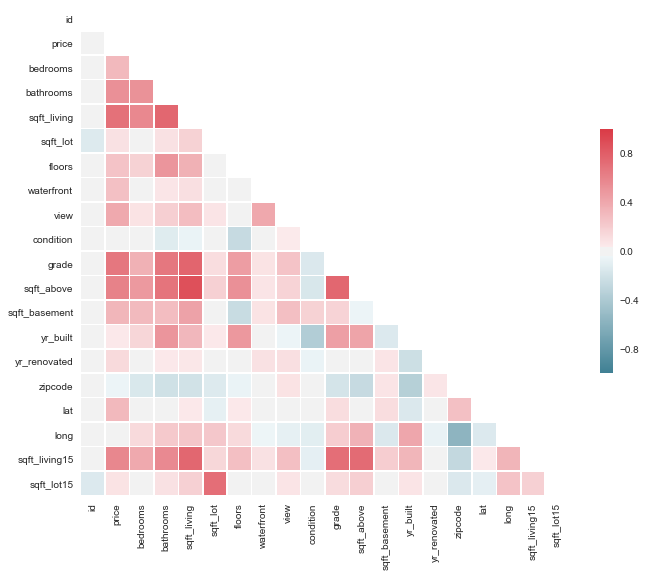

In [9]:
# Définir la couleur du fond
sns.set(style="white")

# Calcul de la matrice de corrélation
corr = data.corr()

# Masque diagonale
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### On remarque 4 variables significatives en corrélation avec le prix : salle de bain, superficie de la maison, superficie en dehors du sous-sol et note globale selon le classement.

In [10]:
# On supprime les variables non significatives
X= data.drop(['price','date','id'], axis=1)
y= data['price']

X.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


# Modèles de Prédiction

## Arbre de décision

In [11]:
# Importer les librairies pour le machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [12]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Root Mean Squared Error is 161578.15797536142
R2 score is 0.7804695266229685


### Evaluation du modèle

In [13]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)

# Calculate the absolute errors
errors = abs(y_test - y_pred)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_pred)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 93235.58 degrees.
Accuracy: 82.0 %.


#### Avec Arbre de décision, prédiction de 82%.

## Random Forest

In [14]:
X2= data.drop(['price','date','id'], axis=1)
y2= data['price']

X2.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2,random_state=0) 

#### Evaluation du modèle Random Forest avec 40 arbres de décisions

In [16]:
regressor = RandomForestRegressor(n_estimators=40)  
regressor.fit(X2_train, y2_train)  
y2_pred = regressor.predict(X2_test)  
rmse = (np.sqrt(mean_squared_error(y2_test,y2_pred)))
r2 = r2_score(y2_test, y2_pred)

print('Root Mean Squared Error is {}'.format(rmse))
print('R2 score is {}'.format(r2))  

Root Mean Squared Error is 114409.77582061331
R2 score is 0.8899333426159477


In [17]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X2_test)

# Calculate the absolute errors
errors = abs(y2_test - y2_pred)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y2_pred)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 65721.89 degrees.
Accuracy: 88.01 %.


#### Avec Random Forest, prédiction de 87.9%

#### Random Forest plus performant que l'Arbre de décision.